In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_palette("viridis")

df = pd.read_csv('../data/raw/telco_churn.csv')
print(f"Размер данных: {df.shape}")
print(f"Колонки: {df.columns.tolist()}")

Размер данных: (1000, 21)
Колонки: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


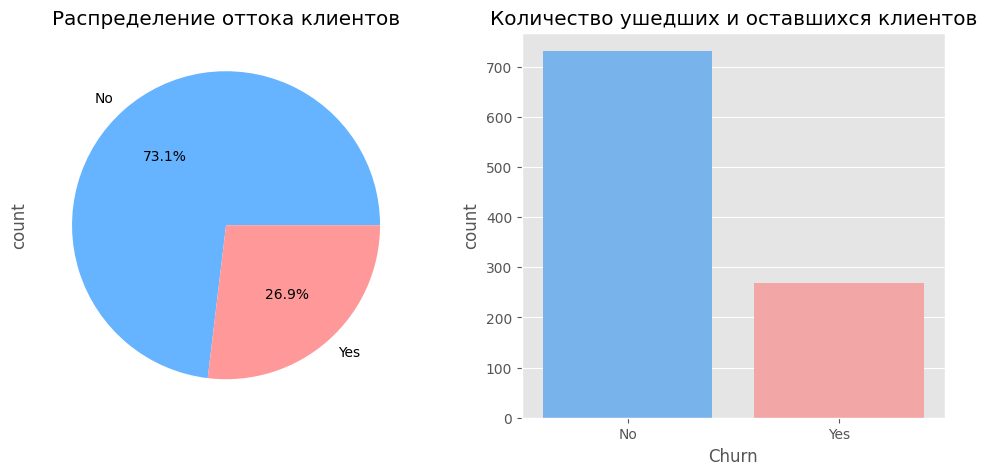

In [3]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Распределение оттока клиентов')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Churn', palette=['#66b3ff', '#ff9999'])
plt.title('Количество ушедших и оставшихся клиентов')
plt.show()

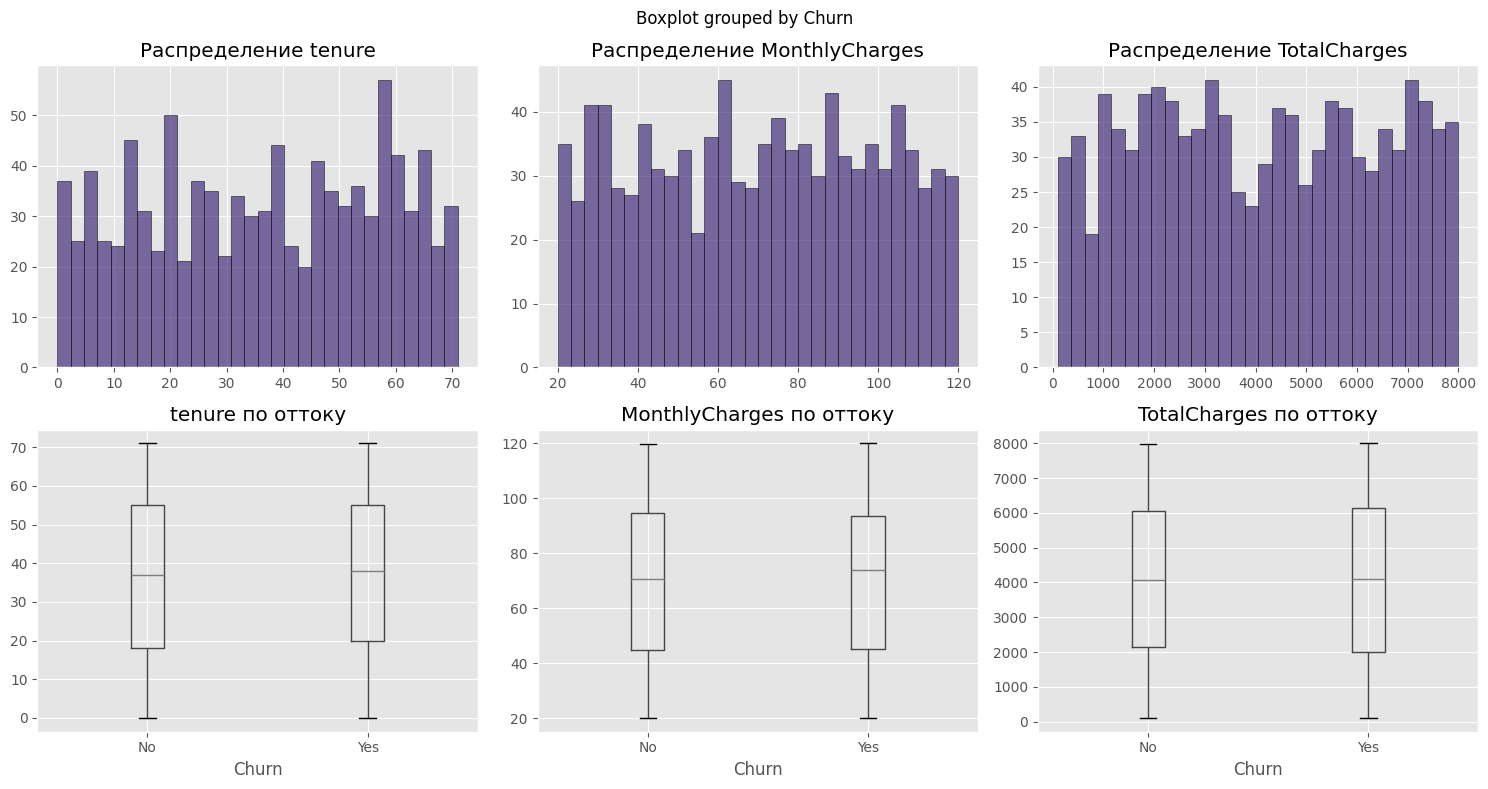

In [4]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, col in enumerate(numeric_cols):
    axes[0, i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'Распределение {col}')
    
    df.boxplot(column=col, by='Churn', ax=axes[1, i])
    axes[1, i].set_title(f'{col} по оттоку')

plt.tight_layout()
plt.show()

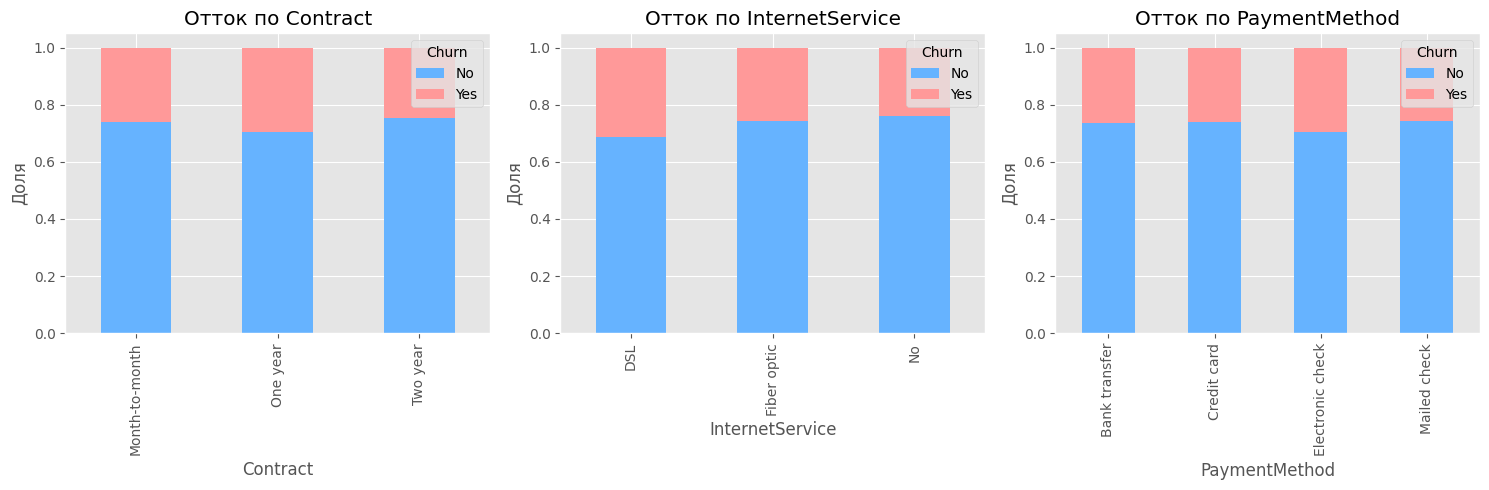

In [5]:
categorical_cols = ['Contract', 'InternetService', 'PaymentMethod']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    pd.crosstab(df[col], df['Churn'], normalize='index').plot(
        kind='bar', stacked=True, ax=axes[i], color=['#66b3ff', '#ff9999']
    )
    axes[i].set_title(f'Отток по {col}')
    axes[i].set_ylabel('Доля')
    axes[i].legend(title='Churn')

plt.tight_layout()
plt.show()

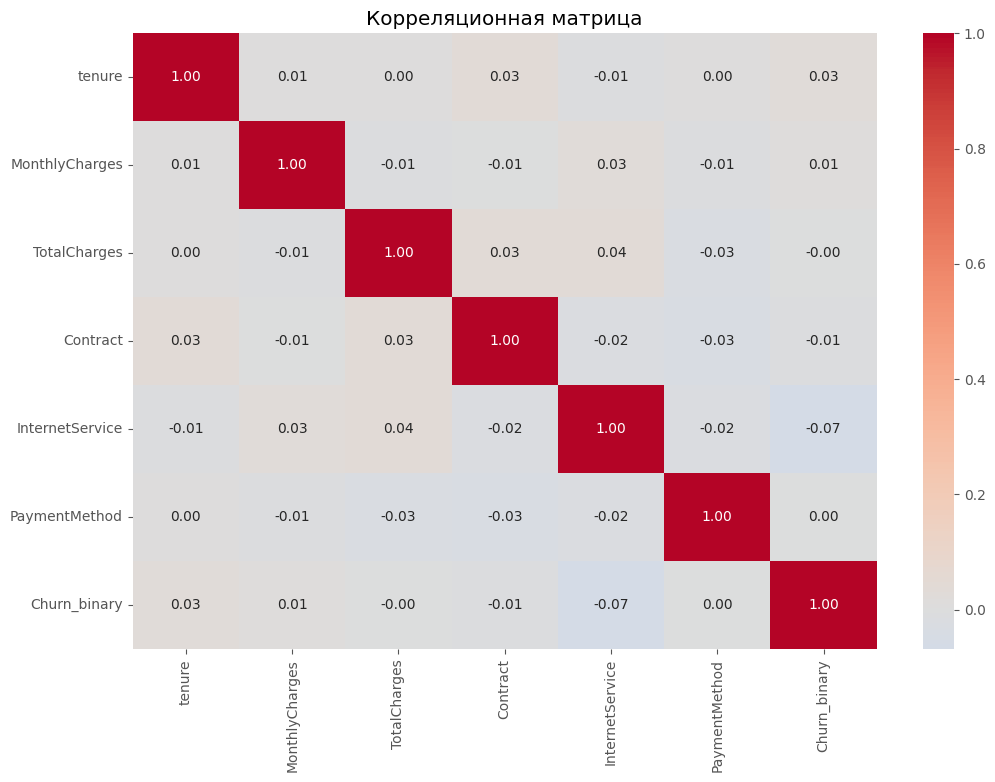

In [6]:
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = pd.Categorical(df_encoded[col]).codes

df_encoded['Churn_binary'] = (df_encoded['Churn'] == 'Yes').astype(int)

plt.figure(figsize=(12, 8))
corr_matrix = df_encoded[numeric_cols + categorical_cols + ['Churn_binary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

In [7]:
print("\n📊 **ОСНОВНЫЕ ВЫВОДЫ:**")
print(f"1. Отток клиентов: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")
print(f"2. Средняя длительность обслуживания: {df['tenure'].mean():.1f} месяцев")
print(f"3. Средний ежемесячный платеж: ${df['MonthlyCharges'].mean():.2f}")
print(f"4. Клиенты с помесячным контрактом уходят чаще всего")


📊 **ОСНОВНЫЕ ВЫВОДЫ:**
1. Отток клиентов: 26.90%
2. Средняя длительность обслуживания: 36.4 месяцев
3. Средний ежемесячный платеж: $69.95
4. Клиенты с помесячным контрактом уходят чаще всего
